## ‰ªªÂä° 5ÔºöÂ§ßÊ®°ÂûãËÉΩÂäõËØÑ‰º∞Ôºà40ÂàÜÔºâ

### ‰Ωú‰∏öË¶ÅÊ±Ç

‰ªéÂºÄÊ∫êÂíåÈó≠Ê∫ê‰∏§Á±ªÂ§ßÊ®°Âûã‰∏≠ÔºåÊØè‰∏ÄÁ±ªËá≥Â∞ëÈÄâÊã© 2 ‰∏™Ê®°Âûã„ÄÅÊØè‰∏™Ê®°ÂûãËá≥Â∞ëÈÄâÊã© 2 ‰∏™ÁâàÊú¨ÔºåÂèÇËÄÉÊñáÁåÆ‰∏≠ÁªôÂá∫ÁöÑËØÑ‰ª∑ÊåáÊ†áÔºåËØÑ‰º∞‰∏çÂêåÁöÑÂ§ßÊ®°ÂûãÊ±ÇËß£ÁÆÄÂçïÊï∞Â≠¶ÈóÆÈ¢òÁöÑËÉΩÂäõ„ÄÇËøõ‰∏ÄÊ≠•ÔºåÈÄöËøáÂ∞ùËØï‰ºòÂåñÊèêÁ§∫„ÄÅÊîπËøõÊ®°Âûã CoT Êé®ÁêÜËøáÁ®ãÁ≠âÊñπÊ≥ïÔºåÊèêÂçáÂ§ßÊ®°ÂûãÁöÑÊÄßËÉΩ„ÄÇ

### ÂèÇËÄÉÊï∞ÊçÆ

[GSM8K](https://huggingface.co/datasets/openai/gsm8k)

### Ë¶ÅÊ±Ç

Êí∞ÂÜô 5 È°µ‰ª•ÂÜÖÁöÑËØÑÊµãÊä•ÂëäÔºåËá≥Â∞ëÂåÖÂê´‰ΩøÁî®ÁöÑÊ®°ÂûãÂèäÂÖ∂ÁâπÁÇπ„ÄÅ‰ºòÂåñÂêéÁöÑ Prompt„ÄÅÊ®°ÂûãÊÄßËÉΩÂØπÊØî‰∏éÂàÜÊûêÁ≠â„ÄÇ

### ÂèÇËÄÉÊñáÁåÆ
 - [Karl Cobbe, et, at. Training Verifiers to Solve Math Word Problems. 2021.](https://arxiv.org/abs/2110.14168) 

---
---

# ÂÆûÈ™åÊä•Âëä

## ÁéØÂ¢É

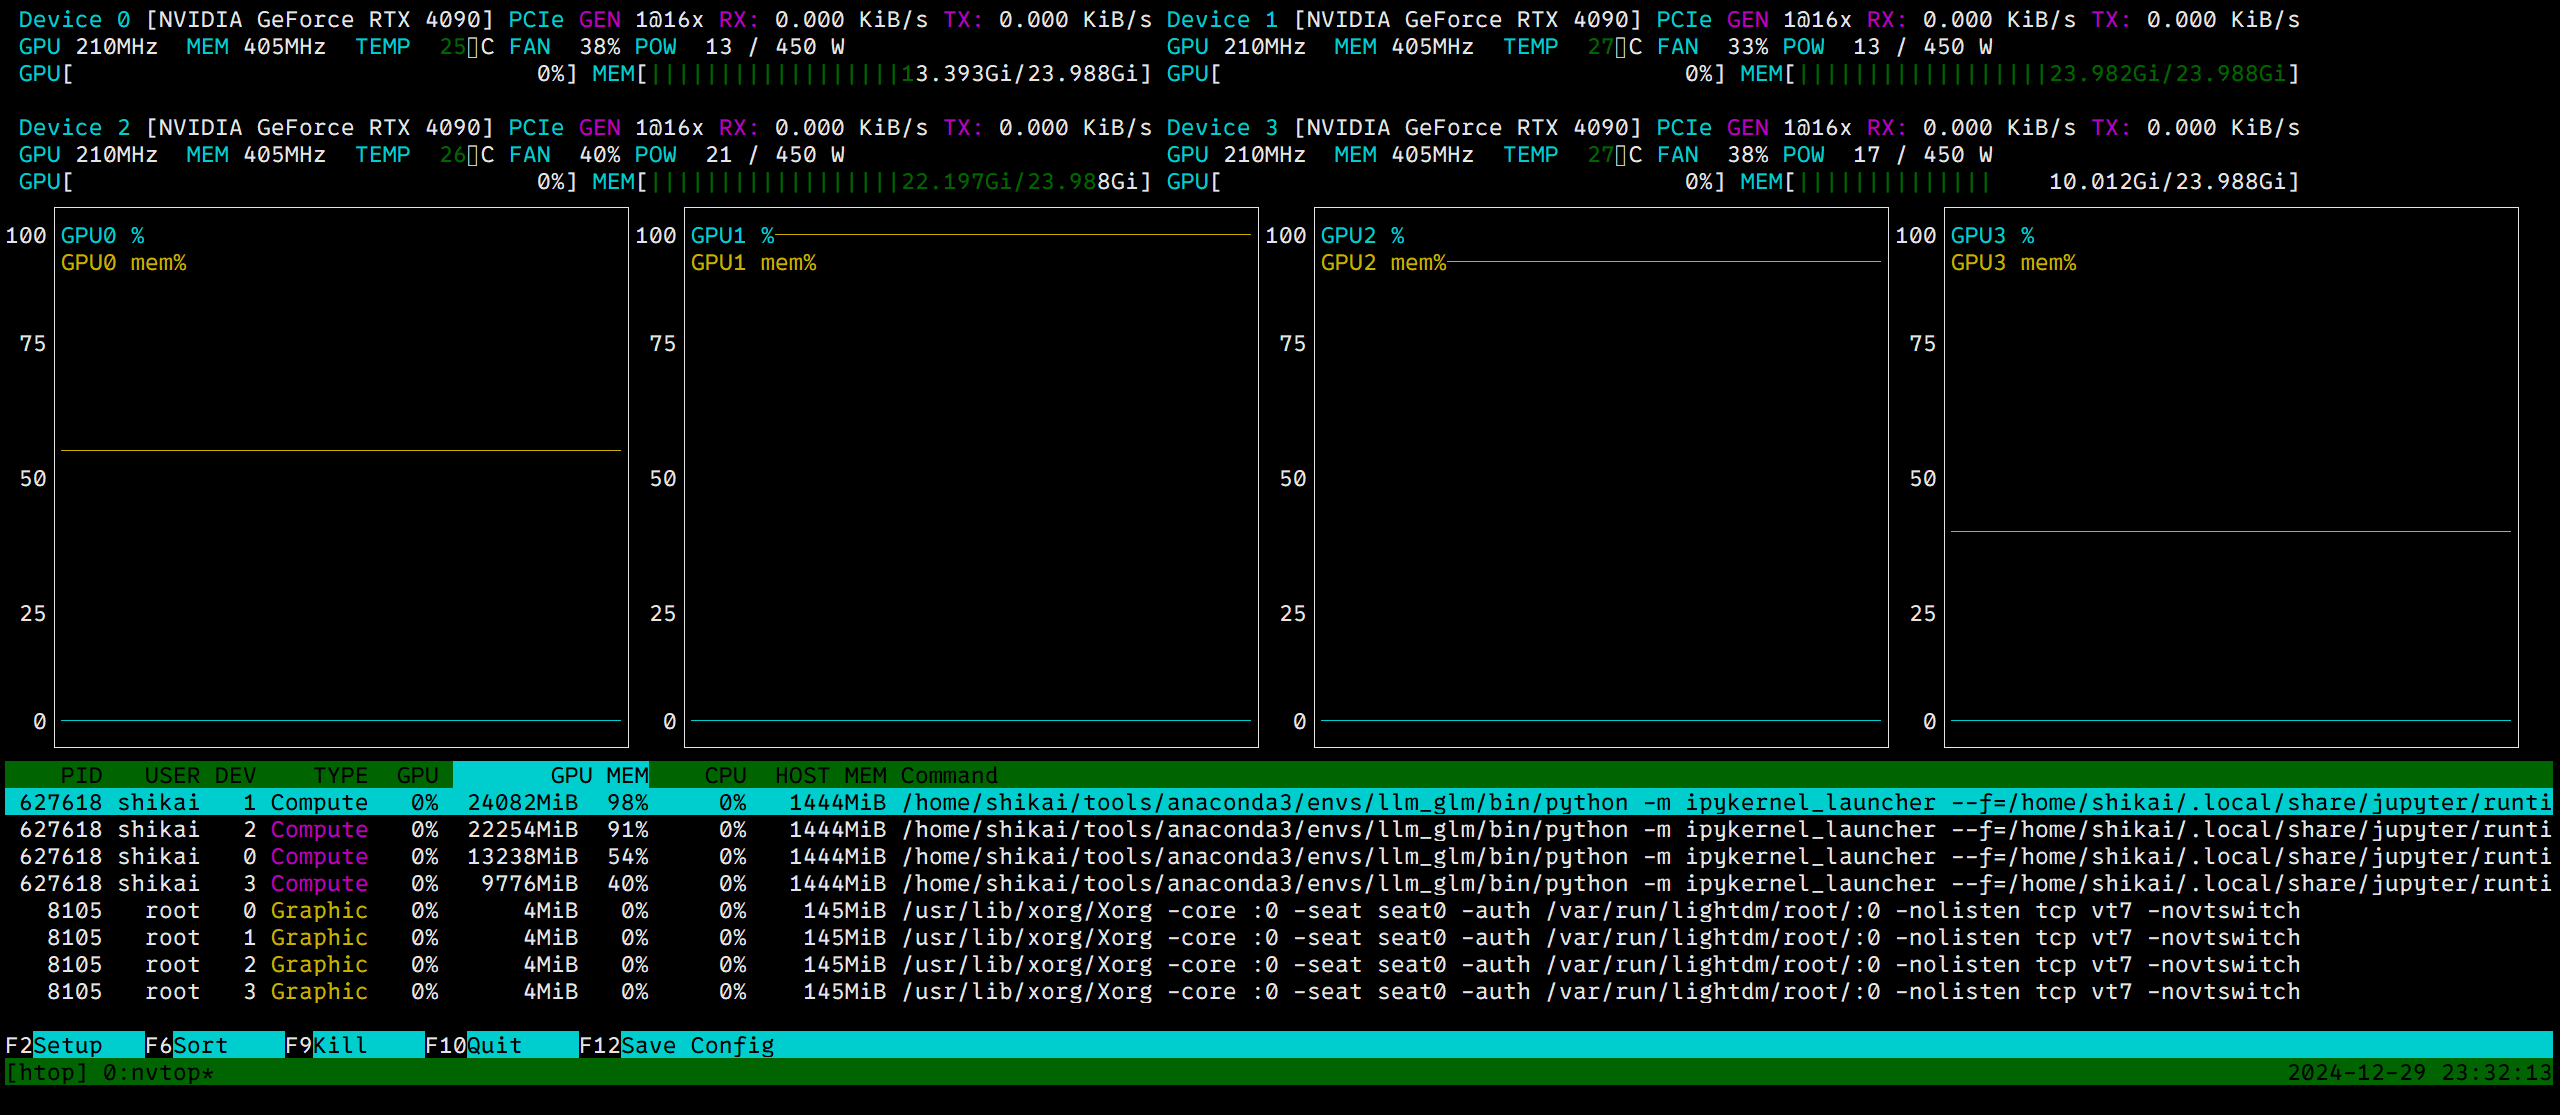

---
---

## Ê∫êÁ†Å üëá
 - ÂºÄÊ∫êÊ®°Âûã
   - [LLAMA-2](https://huggingface.co/meta-llama)
     - [LLAMA-2-7b](https://huggingface.co/meta-llama/Llama-2-7b-hf)
     - [LLAMA-2-13b](https://huggingface.co/meta-llama/Llama-2-13b-hf)
   - [ChatGLM2-6B](https://github.com/THUDM/ChatGLM2-6B)
     - [ChatGLM2-6B](https://huggingface.co/THUDM/chatglm2-6b)
     - [ChatGLM4-9B](https://huggingface.co/THUDM/glm-4-9b-chat-hf)
 - Èó≠Ê∫êÊ®°Âûã
   - GPT
    - GPT-3.5-turbo
    - GPT-4o-mini
   - o1
    - o1-mini
    - o1-preview

---

In [1]:
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, GPTNeoXForCausalLM, GPT2Tokenizer

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from datasets import Dataset

In [2]:
# init logger
import logging, sys, codecs

logger = logging.getLogger()
logger.setLevel(logging.INFO)

def set_log_file(filename:str):
    for handler in logger.handlers[:]:
        logger.removeHandler(handler)

    handler = logging.FileHandler(filename, encoding='utf-8', mode='w')
    formatter = logging.Formatter('[%(asctime)s][%(levelname)s] %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
gsm8k_test_path = "../data/gsm8k/test-00000-of-00001.parquet"
gsm8k_train_path = "../data/gsm8k/train-00000-of-00001.parquet"

ds_test = Dataset.from_parquet(gsm8k_test_path)
ds_train = Dataset.from_parquet(gsm8k_train_path)

print(f"Train Dataset Sample: {ds_train[0]}")
print(f"Test Dataset Sample: {ds_test[0]}")

Train Dataset Sample: {'question': 'Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'}
Test Dataset Sample: {'question': "Janet‚Äôs ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?", 'answer': 'Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.\nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer‚Äôs market.\n#### 18'}


---

## ÂºÄÊ∫êÊ®°Âûã 1.1ÔºöLLAMA-2-7b

In [5]:
from transformers import LlamaForCausalLM, LlamaTokenizer

MODEL_PATH = "../data/Llama-2-7b-hf"
if device.startswith("cuda"):
    device = "cuda:0"

print(f"Using device: {device} for LLAMA-2-7b.")

model_llama_2_7b = LlamaForCausalLM.from_pretrained(MODEL_PATH, torch_dtype=torch.float16).to(device)
tokenizer_llama_2_7b = LlamaTokenizer.from_pretrained(MODEL_PATH)

def infer_with_llama_2_7b(prompt: str) -> str:
    system_prompt = "Answer the following question. At the end of your answer, append a sentence in this format: 'The answer: xxx.', where xxx is a number, with no unit after xxx."
    full_prompt = f'''<<SYS>>{system_prompt}\n<</SYS>>\n[INST]User: {prompt}[/INST]\nAssistant:'''
    
    inputs = tokenizer_llama_2_7b(full_prompt, return_tensors='pt').to(device)
    output = model_llama_2_7b.generate(input_ids=inputs['input_ids'], 
                                              attention_mask=inputs.get('attention_mask'),
                                              max_length=1024,
                                              do_sample=False,
                                              repetition_penalty=1.2,
                                              temperature=0.7)
    generated_text = tokenizer_llama_2_7b.decode(output[0], skip_special_tokens=True)
    return generated_text

Using device: cuda:0 for LLAMA-2-7b.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

---

## ÂºÄÊ∫êÊ®°Âûã 1.2ÔºöLLAMA-2-13B

In [6]:
from transformers import LlamaConfig,LlamaForCausalLM,LlamaTokenizer
from accelerate import init_empty_weights,infer_auto_device_map
import torch


no_split_module_classes = LlamaForCausalLM._no_split_modules

cuda_list = '1,2'.split(',')
memory = '20GiB'
max_memory = {int(cuda):memory for cuda in cuda_list}

MODEL_PATH = "../data/Llama-2-13b-hf"
tokenizer_llama_2_13b = LlamaTokenizer.from_pretrained(MODEL_PATH)

config = LlamaConfig.from_pretrained(MODEL_PATH)
with init_empty_weights():
    model_llama_2_13b = LlamaForCausalLM._from_config(config, torch_dtype=torch.float16)

device_map = infer_auto_device_map(model_llama_2_13b, max_memory=max_memory,no_split_module_classes=no_split_module_classes)

model_llama_2_13b = LlamaForCausalLM.from_pretrained(MODEL_PATH, device_map=device_map, torch_dtype=torch.float16)

print(f"Using device: {device_map} for LLAMA-2-13b.")

def infer_with_llama_2_13b(prompt: str) -> str:
    system_prompt = "Answer the following question. At the end of your answer, append a sentence in this format: 'The answer: xxx.', where xxx is a number, with no unit after xxx."
    full_prompt = f'''<<SYS>>{system_prompt}\n<</SYS>>\n[INST]User: {prompt}[/INST]\nAssistant:'''
    
    inputs = tokenizer_llama_2_13b(full_prompt, return_tensors='pt').to(device)
    output = model_llama_2_13b.generate(input_ids=inputs['input_ids'], 
                                              attention_mask=inputs.get('attention_mask'),
                                              max_length=1024,
                                              do_sample=False,
                                              repetition_penalty=1.2,
                                              temperature=0.7)
    generated_text = tokenizer_llama_2_13b.decode(output[0], skip_special_tokens=True)
    return generated_text

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Using device: OrderedDict([('model.embed_tokens', 1), ('model.layers.0', 1), ('model.layers.1', 1), ('model.layers.2', 1), ('model.layers.3', 1), ('model.layers.4', 1), ('model.layers.5', 1), ('model.layers.6', 1), ('model.layers.7', 1), ('model.layers.8', 1), ('model.layers.9', 1), ('model.layers.10', 1), ('model.layers.11', 1), ('model.layers.12', 1), ('model.layers.13', 1), ('model.layers.14', 1), ('model.layers.15', 1), ('model.layers.16', 1), ('model.layers.17', 1), ('model.layers.18', 1), ('model.layers.19', 1), ('model.layers.20', 1), ('model.layers.21', 1), ('model.layers.22', 1), ('model.layers.23', 1), ('model.layers.24', 1), ('model.layers.25', 1), ('model.layers.26', 1), ('model.layers.27', 1), ('model.layers.28', 1), ('model.layers.29', 1), ('model.layers.30', 1), ('model.layers.31', 1), ('model.layers.32', 2), ('model.layers.33', 2), ('model.layers.34', 2), ('model.layers.35', 2), ('model.layers.36', 2), ('model.layers.37', 2), ('model.layers.38', 2), ('model.layers.39', 

---

## ÂºÄÊ∫êÊ®°Âûã 2.1 ChatGLM2-6B

### Ê®°ÂûãÂÆûÁé∞ÂíåÊùÉÈáç

Áî±‰∫éÊú¨Âú∞ËøûÊé• Huggingface ÁöÑÁΩëÁªúÁéØÂ¢É‰∏ç‰Ω≥ÔºåÊïÖÊ®°ÂûãÂÆûÁé∞ÂíåÊùÉÈáçÂùá‰∏∫Êú¨Âú∞Âä†ËΩΩ„ÄÇ

In [7]:
MODEL_PATH = "../data/chatglm2-6b"

if device.startswith("cuda"):
    device_glm2_6b = "cuda:2"

print(f"Using device: {device_glm2_6b} for ChatGLM2-6B.")

tokenizer_glm2_6b = AutoTokenizer.from_pretrained(MODEL_PATH, trust_remote_code=True)
model_glm2_6b = AutoModel.from_pretrained(MODEL_PATH, trust_remote_code=True, device=device_glm2_6b)
model_glm2_6b = model_glm2_6b.eval()

Using device: cuda:2 for ChatGLM2-6B.


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
def infer_with_glm2_6b(question, history=[]):
    response, _history = model_glm2_6b.chat(tokenizer_glm2_6b, question, history=[])
    return response, _history

---

## ÂºÄÊ∫êÊ®°Âûã 2.2 ChatGLM4-9B

- **[ATTENTION]**
    - Êé®ÁêÜ `ChatGLM4-9B`ÂâçÔºåÈúÄË¶ÅÂçáÁ∫ß Transformers Âà∞ `>= 4.46.0` ÁâàÊú¨ÔºåÂê¶Âàô‰ºöÂá∫Áé∞ÈîôËØØ„ÄÇ
    - `Python` == `3.10.12`

ÂèÇËÄÉËµÑÊñôÔºö
 - [[FIXED] Exception: data did not match any variant of untagged enum ModelWrapper at line 1251003 column 3](https://github.com/unslothai/unsloth/issues/1059)


In [11]:
MODEL_PATH = "../data/glm-4-9b-chat-hf"

if device.startswith("cuda"):
    device_glm4_9b_hf = "cuda:3"
    
print(f"Using device: {device_glm4_9b_hf} for ChatGLM4-9B.")

tokenizer_glm4_9b_hf = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=MODEL_PATH, trust_remote_code=True)
model_glm4_9b_hf = AutoModelForCausalLM.from_pretrained(
    MODEL_PATH,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map='auto'
).eval()

Using device: cuda:3 for ChatGLM4-9B.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
def infer_with_glm4_9b_hf(question):
    message = [
        {
            "role": "system",
            "content": "Answer the following question. At the end of you answer, include 'The answer: xxx.', xxx is a number. "
        },
        {
            "role": "user",
            "content": question
        }
    ]
    inputs = tokenizer_glm4_9b_hf.apply_chat_template(message,
                                       add_generation_prompt=True,
                                       tokenize=True,
                                       return_tensors="pt",
                                       return_dict=True
                                       )
    try:    
        inputs['input_ids'] = inputs['input_ids'].to('cuda')
        inputs['attention_mask'] = inputs['attention_mask'].to('cuda')
    except:
        pass
           
    gen_kwargs = {"max_length": 4000, "do_sample": True, "top_k": 1}
    with torch.no_grad():
        outputs = model_glm4_9b_hf.generate(**inputs, **gen_kwargs)
        outputs = outputs[:, inputs['input_ids'].shape[1]:]
        print(tokenizer_glm4_9b_hf.decode(outputs[0], skip_special_tokens=True))
        return tokenizer_glm4_9b_hf.decode(outputs[0], skip_special_tokens=True)

---

## Èó≠Ê∫êÊ®°Âûã 1.1 GPT4o
## Èó≠Ê∫êÊ®°Âûã 1.2 GPT4o-mini
## Èó≠Ê∫êÊ®°Âûã 2.1 o1-mini
## Èó≠Ê∫êÊ®°Âûã 2.2 o1-preview

### ÂèØÁî®ÁöÑÊ®°Âûã üëá

ÊàëÁöÑ OpenAI API ÁõÆÂâçÂèØÁî®ÁöÑÊ®°ÂûãÊúâÔºö

 - `gpt-4o-audio-preview-2024-10-01`
 - `gpt-4o-realtime-preview`
 - `gpt-4o-realtime-preview-2024-10-01`
 - `o1-mini-2024-09-12`
 - `dall-e-2`
 - `gpt-4-turbo`
 - `gpt-4-1106-preview`
 - `gpt-3.5-turbo`
 - `gpt-3.5-turbo-0125`
 - `gpt-3.5-turbo-instruct`
 - `babbage-002`
 - `whisper-1`
 - `dall-e-3`
 - `text-embedding-3-small`
 - `gpt-3.5-turbo-16k`
 - `gpt-4-0125-preview`
 - `gpt-4-turbo-preview`
 - `omni-moderation-latest`
 - `gpt-4o-2024-05-13`
 - `omni-moderation-2024-09-26`
 - `tts-1-hd-1106`
 - `chatgpt-4o-latest`
 - `gpt-4`
 - `gpt-4-0613`
 - `o1-mini`
 - `o1-preview`
 - `o1-preview-2024-09-12`
 - `tts-1-hd`
 - `text-embedding-ada-002`
 - `gpt-3.5-turbo-1106`
 - `gpt-4o-audio-preview`
 - `tts-1`
 - `tts-1-1106`
 - `gpt-3.5-turbo-instruct-0914`
 - `davinci-002`
 - `text-embedding-3-large`
 - `gpt-4o-realtime-preview-2024-12-17`
 - `gpt-4o-mini-realtime-preview`
 - `gpt-4o-mini-realtime-preview-2024-12-17`
 - `gpt-4o-2024-08-06`
 - `gpt-4o`
 - `gpt-4o-mini`
 - `gpt-4o-mini-2024-07-18`
 - `gpt-4o-2024-11-20`
 - `gpt-4o-audio-preview-2024-12-17`
 - `gpt-4o-mini-audio-preview`
 - `gpt-4o-mini-audio-preview-2024-12-17`
 - `gpt-4-turbo-2024-04-09`


In [ ]:
import openai

OPENAI_API_KEY = "sk-lalalalala..."

from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)
print(client.models.list())

def infer_with_gpt(prompt, model="gpt-3.5-turbo"):
    if model not in ["gpt-3.5-turbo", "gpt-4o-mini", "o1-mini", "o1-preview"]:
        raise ValueError("model must be either 'gpt-3.5-turbo' or 'gpt-4o-mini' or 'o1-mini' or 'o1-preview'")
    
    message = [
            {
                "role": "system",
                "content": "Answer the following question and do not use markdown, reply in plaintext. At the end of you answer, include 'The answer: xxx.', xxx is a number. "
            },
            {
                "role": "user",
                "content": f"{prompt}"
            }
        ]
    if model == 'o1-mini' or model == 'o1-preview':
        message[0]["role"] = "assistant"
    else:
        message[0]["role"] = "system"
    
    completion = client.chat.completions.create(
        model=model,
        messages=message
    )
    output = None
    try:
        output = completion.choices[0].message.content
    except:
        pass
    return output  

SyncPage[Model](data=[Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview', created=1727659998, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview-2024-10-01', created=1727131766, object='model', owned_by='system'), Model(id='gpt-4o-mini', created=1721172741, object='model', owned_by='system'), Model(id='o1-mini-2024-09-12', created=1725648979, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='gpt-4-turbo', created=1712361441, object='model', owned_by='system'), Model(id='gpt-4-1106-preview', created=1698957206, object='model', owned_by='system'), Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'), Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct', created=1692901427, object='model', owned_by='system'), Model(id='ba

---

## LLM ËØÑ‰ª∑

ËøôÈÉ®ÂàÜÂ∞ÜÂü∫‰∫é `GSM8K` Math Solving Êï∞ÊçÆÈõÜÔºåÂØπ‰∏äËø∞ÁöÑ 8 ‰∏™Ê®°ÂûãËøõË°åËØÑ‰ª∑„ÄÇ

ËøôÈáåÊ†πÊçÆÂèÇËÄÉÊñáÁåÆ‰∏≠ÁöÑ `CoT` Êé®ÁêÜÊñπÊ≥ïËøõË°åÂÆûÈ™åÔºåËØÑ‰º∞Ëøô‰∫õÊ®°ÂûãÂú® 1396 ‰∏™ÊµãËØïÊ†∑Êú¨‰∏äÁöÑÁªìÊûúÊ≠£Á°ÆÊÄß„ÄÇ

In [14]:
def judge(truth:str, answer:str) -> bool:
    """_summary_
        extract the numbers from the answer.
        
        e.g. Truth: "Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day. \nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer‚Äôs market.\n#### 18"
        
        e.g. Answer: "First find how many eggs Janet eats each day: 16 eggs / day - 3 eggs / day = 13 eggs / day. Then find how many eggs she bakes each day: 13 eggs / day * 4 eggs / day = 52 eggs / day. Then find the total number of eggs she sells each day: 52 eggs / day - 13 eggs / day = 39 eggs / day. Then multiply the number of eggs she sells by the price per egg to find her total earnings: 39 eggs / day * $2 / egg = $78 / day.\nThe answer: 78."
        
        In Truth, the number '18' after the last '####' is the final answer.
        In Answer, the number '78' after the last 'The answer: ' is the final answer.
    """
    logging.info(f"[Judge] [Truth]: {truth}")
    logging.info(f"[Judge] [Answer]: {answer}")
    success = False
    try:
        truth_num = int(truth.split('####')[-1].strip())
        answer_num = answer.split('The answer: ')[-1].strip()
        if answer_num.endswith('.'):
            answer_num = answer_num.split('.')[0].strip()
        answer_num = int(answer_num)
        success = (truth_num == answer_num)
        logging.info(f"[Judge] {success}. Truth: {truth_num}, Answer: {answer_num}")
    except Exception as e:
        success = False
        logging.info(f"[Judge] Skip this question for patten dismatch: {e}")
    finally:
        return success

In [15]:

# CoT Êé®ÁêÜÊèêÁ§∫ÁîüÊàêÂáΩÊï∞
def generate_cot_prompt(problem):
    return f"Let's solve this problem step by step: {problem}"

# ËØÑ‰ª∑ÂáΩÊï∞
def evaluate_accuracy(model:str, dataset, cot_prompt=False):
    set_log_file(f"evaluate_{model}.log")
    
    correct_count = 0
    current_count = 0
    total_count = len(dataset)
    
    MAX_TRIAL = 100
        
    for example in dataset:
        MAX_TRIAL -= 1
        if MAX_TRIAL <= 0:
            break
        question = example["question"]
        truth = example["answer"]
        
        if cot_prompt:
            prompt = generate_cot_prompt(question)
        else:
            prompt = question
        
        current_count += 1
        logging.info(f"[Evaluate] eval at {current_count}/{total_count}")
        
        if model == "gpt-3.5-turbo":
            model_result = infer_with_gpt(prompt, model="gpt-3.5-turbo")
        elif model == "gpt-4o-mini":
            model_result = infer_with_gpt(prompt, model="gpt-4o-mini")
        elif model == "o1-mini":
            model_result = infer_with_gpt(prompt, model="o1-mini")
        elif model == "o1-preview":
            model_result = infer_with_gpt(prompt, model="o1-preview")
        elif model == "glm2-6b":
            model_result, _ = infer_with_glm2_6b(prompt)
        elif model == "glm4_9b_hf":
            model_result = infer_with_glm4_9b_hf(prompt)
        elif model == "llama_2_7b":
            model_result = infer_with_llama_2_7b(prompt)
        elif model == "llama_2_13b":
            model_result = infer_with_llama_2_13b(prompt)
        else:
            print(f"Model '{model}' is not supported.")
            return
        
        if judge(truth, model_result):
            correct_count += 1
    
    accuracy = correct_count / total_count
    return accuracy

In [ ]:
glm2_6b_accuracy = evaluate_accuracy("glm2-6b", dataset=ds_test, cot_prompt=True)
print(f"ChatGLM2-6B Accuracy: {glm2_6b_accuracy * 100:.2f}%")

In [ ]:
glm4_9b_hf_accuracy = evaluate_accuracy("glm4_9b_hf", dataset=ds_test, cot_prompt=True)
print(f"GLM4-9B-HF Accuracy: {glm4_9b_hf_accuracy * 100:.2f}%")

In [ ]:
llam_2_7b_accuracy = evaluate_accuracy("llama_2_7b", dataset=ds_test, cot_prompt=True)
print(f"LLAM-2-7b Accuracy: {llam_2_7b_accuracy * 100:.2f}%")

In [ ]:
llam_2_13b_accuracy = evaluate_accuracy("llama_2_13b", dataset=ds_test, cot_prompt=True)
print(f"LLAM-2-13b Accuracy: {llam_2_13b_accuracy * 100:.2f}%")

In [ ]:
gpt_3_5_turbo_accuracy = evaluate_accuracy("gpt-3.5-turbo", dataset=ds_test, cot_prompt=True)
print(f"GPT-3.5-turbo Accuracy: {gpt_3_5_turbo_accuracy * 100:.2f}%")

In [ ]:
gpt_4o_mini_accuracy = evaluate_accuracy("gpt-4o-mini", dataset=ds_test, cot_prompt=True)
print(f"GPT-4o-mini Accuracy: {gpt_4o_mini_accuracy * 100:.2f}%")

In [ ]:
gpt_o1_mini_accuracy = evaluate_accuracy("o1-mini", dataset=ds_test, cot_prompt=True)
print(f"o1-mini Accuracy: {gpt_o1_mini_accuracy * 100:.2f}%")

In [ ]:
gpt_o1_preview_accuracy = evaluate_accuracy("o1-preview", dataset=ds_test, cot_prompt=True)
print(f"o1-preview Accuracy: {gpt_o1_preview_accuracy * 100:.2f}%")